<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(_0_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.8_n250.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,91.865507,28.891308,73.343283,61.496309,-0.498303,265.098105,265.463998,-0.365893
1,0.0,1.0,96.965739,64.336319,73.358335,51.525061,-0.098141,296.087313,296.114173,-0.026861
2,0.0,2.0,70.400640,49.513489,53.948634,72.657006,0.166164,256.685934,256.485170,0.200764
3,0.0,3.0,81.158283,65.495116,78.172498,91.144246,-0.214919,325.755224,325.866291,-0.111067
4,0.0,4.0,25.396313,30.042818,33.867131,77.010306,0.057338,176.373906,176.368439,0.005467
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,85.344296,89.069818,50.164112,40.257883,0.093127,274.929237,274.868140,0.061097
29996,999.0,26.0,32.355214,62.476126,70.151621,21.473518,0.066827,196.523305,196.422845,0.100460
29997,999.0,27.0,29.318113,84.097589,66.217541,92.866659,0.002261,282.502163,282.495586,0.006577
29998,999.0,28.0,75.653945,84.480912,41.723358,89.979863,-0.167086,301.670991,301.904443,-0.233452


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,91.865507,28.891308,73.343283,61.496309,-0.498303,265.098105,265.463998,-0.365893
1,0.0,1.0,96.965739,64.336319,73.358335,51.525061,-0.098141,296.087313,296.114173,-0.026861
2,0.0,2.0,70.400640,49.513489,53.948634,72.657006,0.166164,256.685934,256.485170,0.200764
3,0.0,3.0,81.158283,65.495116,78.172498,91.144246,-0.214919,325.755224,325.866291,-0.111067
4,0.0,4.0,25.396313,30.042818,33.867131,77.010306,0.057338,176.373906,176.368439,0.005467
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,85.344296,89.069818,50.164112,40.257883,0.093127,274.929237,274.868140,0.061097
29996,999.0,26.0,32.355214,62.476126,70.151621,21.473518,0.066827,196.523305,196.422845,0.100460
29997,999.0,27.0,29.318113,84.097589,66.217541,92.866659,0.002261,282.502163,282.495586,0.006577
29998,999.0,28.0,75.653945,84.480912,41.723358,89.979863,-0.167086,301.670991,301.904443,-0.233452


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    91.865507  28.891308  73.343283  61.496309 -0.498303  265.098105   
      1.0    96.965739  64.336319  73.358335  51.525061 -0.098141  296.087313   
      2.0    70.400640  49.513489  53.948634  72.657006  0.166164  256.685934   
      3.0    81.158283  65.495116  78.172498  91.144246 -0.214919  325.755224   
      4.0    25.396313  30.042818  33.867131  77.010306  0.057338  176.373906   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   85.344296  89.069818  50.164112  40.257883  0.093127  274.929237   
      26.0   32.355214  62.476126  70.151621  21.473518  0.066827  196.523305   
      27.0   29.318113  84.097589  66.217541  92.866659  0.002261  282.502163   
      28.0   75.653945  84.480912  41.723358  89.979863 -0.167086  301.670991   
      29.0   63.288917  92.757863  46.706344  49.083571  0.079820  261.916514   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    265.463998 -0.365893  
      1.0    296.114173 -0.026861  
      2.0    256.485170  0.200764  
      3.0    325.866291 -0.111067  
      4.0    176.368439  0.005467  
...                 ...       ...  
999.0 25.0   274.868140  0.061097  
      26.0   196.422845  0.100460  
      27.0   282.495586  0.006577  
      28.0   301.904443 -0.233452  
      29.0   261.867621  0.048893  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    91.865507  28.891308  73.343283  61.496309 -0.498303  265.098105   
      1.0    96.965739  64.336319  73.358335  51.525061 -0.098141  296.087313   
      2.0    70.400640  49.513489  53.948634  72.657006  0.166164  256.685934   
      3.0    81.158283  65.495116  78.172498  91.144246 -0.214919  325.755224   
      4.0    25.396313  30.042818  33.867131  77.010306  0.057338  176.373906   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   85.344296  89.069818  50.164112  40.257883  0.093127  274.929237   
      26.0   32.355214  62.476126  70.151621  21.473518  0.066827  196.523305   
      27.0   29.318113  84.097589  66.217541  92.866659  0.002261  282.502163   
      28.0   75.653945  84.480912  41.723358  89.979863 -0.167086  301.670991   
      29.0   63.288917  92.757863  46.706344  49.083571  0.079820  261.916514   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    265.463998 -0.365893  
      1.0    296.114173 -0.026861  
      2.0    256.485170  0.200764  
      3.0    325.866291 -0.111067  
      4.0    176.368439  0.005467  
...                 ...       ...  
999.0 25.0   274.868140  0.061097  
      26.0   196.422845  0.100460  
      27.0   282.495586  0.006577  
      28.0   301.904443 -0.233452  
      29.0   261.867621  0.048893  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,91.865507,28.891308,73.343283,61.496309,-0.498303,265.098105,265.463998,-0.365893
1,0.0,1.0,96.965739,64.336319,73.358335,51.525061,-0.098141,296.087313,296.114173,-0.026861
2,0.0,2.0,70.400640,49.513489,53.948634,72.657006,0.166164,256.685934,256.485170,0.200764
3,0.0,3.0,81.158283,65.495116,78.172498,91.144246,-0.214919,325.755224,325.866291,-0.111067
4,0.0,4.0,25.396313,30.042818,33.867131,77.010306,0.057338,176.373906,176.368439,0.005467
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,85.344296,89.069818,50.164112,40.257883,0.093127,274.929237,274.868140,0.061097
29996,999.0,26.0,32.355214,62.476126,70.151621,21.473518,0.066827,196.523305,196.422845,0.100460
29997,999.0,27.0,29.318113,84.097589,66.217541,92.866659,0.002261,282.502163,282.495586,0.006577
29998,999.0,28.0,75.653945,84.480912,41.723358,89.979863,-0.167086,301.670991,301.904443,-0.233452


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    91.865507  28.891308  73.343283  61.496309 -0.498303  265.098105   
      1.0    96.965739  64.336319  73.358335  51.525061 -0.098141  296.087313   
      2.0    70.400640  49.513489  53.948634  72.657006  0.166164  256.685934   
      3.0    81.158283  65.495116  78.172498  91.144246 -0.214919  325.755224   
      4.0    25.396313  30.042818  33.867131  77.010306  0.057338  176.373906   
...                ...        ...        ...        ...       ...         ...   
999.0 25.0   85.344296  89.069818  50.164112  40.257883  0.093127  274.929237   
      26.0   32.355214  62.476126  70.151621  21.473518  0.066827  196.523305   
      27.0   29.318113  84.097589  66.217541  92.866659  0.002261  282.502163   
      28.0   75.653945  84.480912  41.723358  89.979863 -0.167086  301.670991   
      29.0   63.288917  92.757863  46.706344  49.083571  0.079820  261.916514   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    265.463998 -0.365893  
      1.0    296.114173 -0.026861  
      2.0    256.485170  0.200764  
      3.0    325.866291 -0.111067  
      4.0    176.368439  0.005467  
...                 ...       ...  
999.0 25.0   274.868140  0.061097  
      26.0   196.422845  0.100460  
      27.0   282.495586  0.006577  
      28.0   301.904443 -0.233452  
      29.0   261.867621  0.048893  

[30000 rows x 8 columns]

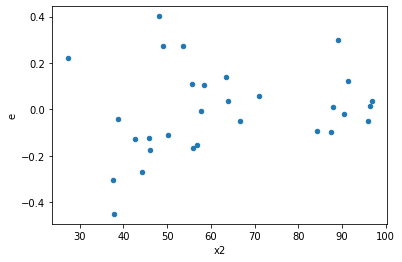

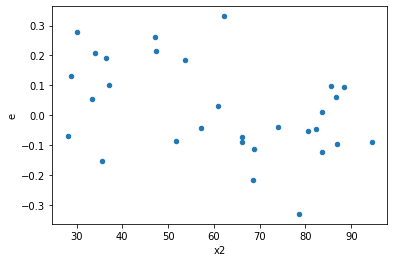

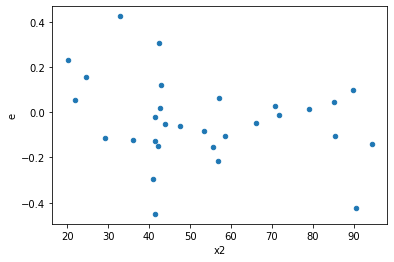

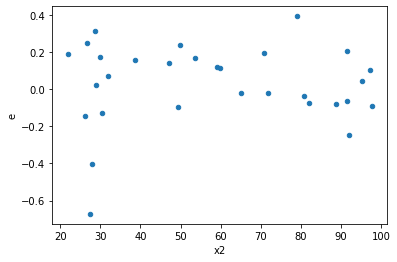

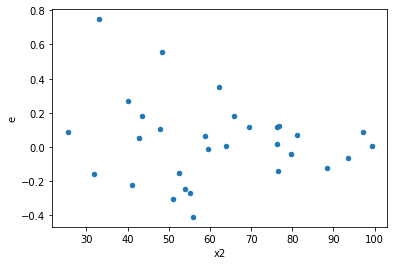

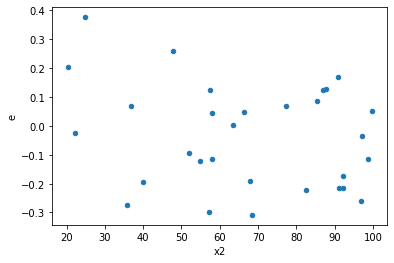

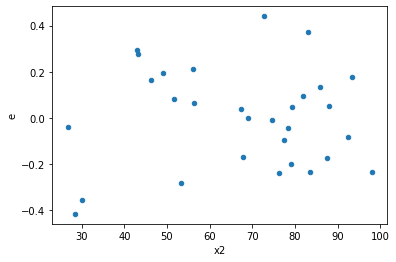

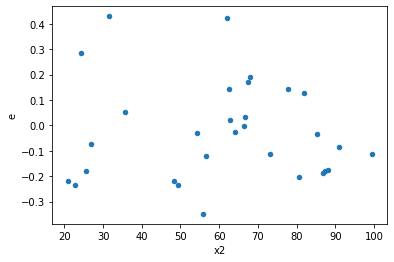

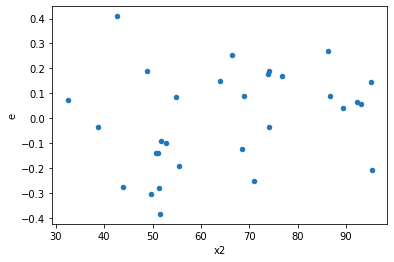

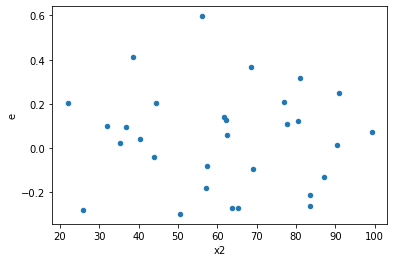

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,8.0,8.0,0.339724930279904,0.46603836888414923,0.042465616284988,0.058254796110518654,1.3718109192050576,0.665385612611759,0.6673071936941205,0.3326928063058795,Reject005=1 : Homoscedasticity
6.0,8.0,8.0,0.08202529513780608,0.2609744820229367,0.01025316189222576,0.03262181025286709,3.1816341725377297,0.12193665929223596,0.939031670353882,0.06096832964611798,Reject005=1 : Homoscedasticity
15.0,8.0,8.0,0.08802301221484471,0.19976021559476217,0.011002876526855589,0.024970026949345272,2.269408993947988,0.26753645221806677,0.8662317738909666,0.13376822610903338,Reject005=1 : Homoscedasticity
18.0,8.0,8.0,0.2820373744682138,0.34252821293575064,0.035254671808526726,0.04281602661696883,1.2144780938398443,0.790111034008139,0.6049444829959305,0.3950555170040695,Reject005=1 : Homoscedasticity
22.0,8.0,8.0,0.510557128626404,0.5282480283147843,0.0638196410783005,0.06603100353934804,1.0346501864266897,0.9627575765977798,0.5186212117011101,0.4813787882988899,Reject005=1 : Homoscedasticity
31.0,8.0,8.0,0.21319624421314448,0.5020900024300573,0.02664953052664306,0.06276125030375716,2.3550602604804296,0.24706225120095215,0.8764688743995239,0.12353112560047608,Reject005=1 : Homoscedasticity
37.0,8.0,8.0,0.15673085399353825,0.2751530022029758,0.019591356749192282,0.03439412527537197,1.7555764879218987,0.44328842738265006,0.778355786308675,0.22164421369132503,Reject005=1 : Homoscedasticity
39.0,8.0,8.0,0.20295874023869026,0.6389790180348772,0.025369842529836283,0.07987237725435965,3.148319787969732,0.12520270987550375,0.9373986450622481,0.06260135493775187,Reject005=1 : Homoscedasticity
41.0,8.0,8.0,0.20143442138773063,0.5376644613023676,0.02517930267346633,0.06720805766279594,2.66917867164046,0.18649711381626988,0.9067514430918651,0.09324855690813494,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,0.2899459063952158,0.13638172740457788,0.03624323829940197,0.017047715925572235,0.4703695565154157,0.3065770169820561,Reject005=1 : Homoscedasticity
1.0,8.0,8.0,0.6311723832679931,0.12790859028717957,0.07889654790849913,0.015988573785897447,0.20265238733182997,0.03666224135917313,Reject005=0 : Heteroscedasticity
2.0,8.0,8.0,0.3743450689007116,0.24035532065444232,0.04679313361258895,0.03004441508180529,0.6420688840920522,0.5451950288095639,Reject005=1 : Homoscedasticity
3.0,8.0,8.0,0.14895967879265137,0.09264115138004851,0.01861995984908142,0.011580143922506064,0.6219209931903987,0.5168977270108375,Reject005=1 : Homoscedasticity
4.0,8.0,8.0,0.5764702922776053,0.08726406635021455,0.07205878653470066,0.010908008293776819,0.15137651934402135,0.015011568449122216,Reject005=0 : Heteroscedasticity
5.0,8.0,8.0,0.339724930279904,0.46603836888414923,0.042465616284988,0.058254796110518654,1.3718109192050576,0.665385612611759,Reject005=1 : Homoscedasticity
6.0,8.0,8.0,0.08202529513780608,0.2609744820229367,0.01025316189222576,0.03262181025286709,3.1816341725377297,0.12193665929223596,Reject005=1 : Homoscedasticity
7.0,8.0,8.0,0.2672712620382471,0.0754345499053027,0.033408907754780885,0.009429318738162837,0.2822396591763309,0.09243584678291034,Reject005=1 : Homoscedasticity
8.0,8.0,8.0,0.47394457662115336,0.11920636826835135,0.05924307207764417,0.014900796033543919,0.25151963784077375,0.06780816015725794,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      893
Reject005=0 : Heteroscedasticity    107
Name: Result_test, dtype: int64